# Connect to Chinook Database

In [1]:
from sqlalchemy import create_engine, inspect
import pandas as pd

## Check out table

In [2]:
engine = create_engine("sqlite:///Chinook.sqlite")
inspector = inspect(engine)
table_names = inspector.get_table_names()
table_names

['Album',
 'Artist',
 'Customer',
 'Employee',
 'Genre',
 'Invoice',
 'InvoiceLine',
 'MediaType',
 'Playlist',
 'PlaylistTrack',
 'Track']

## Check out ArtistId

In [3]:
queen_df = pd.read_sql_query("SELECT * FROM Artist WHERE Name = 'Queen'", con=engine)
queen_id = int(queen_df["ArtistId"].values[0])
queen_id

51

## Check out AlbumId

In [4]:
queen_album = pd.read_sql_query(f"SELECT * FROM Album WHERE ArtistId = {queen_id}", con=engine)
queen_album

,AlbumId,Title,ArtistId
0,36,Greatest Hits II,51
1,185,Greatest Hits I,51
2,186,News Of The World,51


In [5]:
album_id = queen_album["AlbumId"].values
album_id = tuple(map(lambda x: int(x), album_id))
album_id

(36, 185, 186)

## Check out Track

In [6]:
track_df = pd.read_sql_query(f"SELECT * FROM Track WHERE AlbumId IN {album_id}", con=engine)
track_df.head()

,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,419,A Kind Of Magic,36,1,1,Roger Taylor,262608,8689618,0.99
1,420,Under Pressure,36,1,1,Queen & David Bowie,236617,7739042,0.99
2,421,Radio GA GA,36,1,1,Roger Taylor,343745,11358573,0.99
3,422,I Want It All,36,1,1,Queen,241684,7876564,0.99
4,423,I Want To Break Free,36,1,1,John Deacon,259108,8552861,0.99


In [7]:
track_df.rename(columns={"Name":"title", "Milliseconds":"milliseconds"}, inplace=True)
track_df.head()

,TrackId,title,AlbumId,MediaTypeId,GenreId,Composer,milliseconds,Bytes,UnitPrice
0,419,A Kind Of Magic,36,1,1,Roger Taylor,262608,8689618,0.99
1,420,Under Pressure,36,1,1,Queen & David Bowie,236617,7739042,0.99
2,421,Radio GA GA,36,1,1,Roger Taylor,343745,11358573,0.99
3,422,I Want It All,36,1,1,Queen,241684,7876564,0.99
4,423,I Want To Break Free,36,1,1,John Deacon,259108,8552861,0.99


In [8]:
track_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       45 non-null     int64  
 1   title         45 non-null     object 
 2   AlbumId       45 non-null     int64  
 3   MediaTypeId   45 non-null     int64  
 4   GenreId       45 non-null     int64  
 5   Composer      45 non-null     object 
 6   milliseconds  45 non-null     int64  
 7   Bytes         45 non-null     int64  
 8   UnitPrice     45 non-null     float64
dtypes: float64(1), int64(6), object(2)
memory usage: 3.3+ KB


In [9]:
track_df["minute"] = round(track_df["milliseconds"] / 60000, 2)
track_df.head()

,TrackId,title,AlbumId,MediaTypeId,GenreId,Composer,milliseconds,Bytes,UnitPrice,minute
0,419,A Kind Of Magic,36,1,1,Roger Taylor,262608,8689618,0.99,4.38
1,420,Under Pressure,36,1,1,Queen & David Bowie,236617,7739042,0.99,3.94
2,421,Radio GA GA,36,1,1,Roger Taylor,343745,11358573,0.99,5.73
3,422,I Want It All,36,1,1,Queen,241684,7876564,0.99,4.03
4,423,I Want To Break Free,36,1,1,John Deacon,259108,8552861,0.99,4.32


In [10]:
chinook = track_df[["title", "minute"]]
chinook.head()

,title,minute
0,A Kind Of Magic,4.38
1,Under Pressure,3.94
2,Radio GA GA,5.73
3,I Want It All,4.03
4,I Want To Break Free,4.32


# Web Scraping and Cleaning data

In [11]:
import gazpacho as gaz
import pandas as pd
import requests

In [12]:
extract_text = lambda x: x.find("a").strip() if x.find("a") else x.strip()
strip_text = lambda x: x.strip() if x else ""
append_list = lambda mylist, x: mylist.append(x)

## Knorb.net

In [13]:
url = "https://kworb.net/spotify/artist/1dfeR4HaWDbWqFHLkxsg1d_songs.html"
response = requests.get(url)
response.status_code

200

In [14]:
txt = gaz.Soup(response.text)
table = txt.find("table")
table = table[1].find("tr")[1:]

In [15]:
table[0].find("td")[0].find("a").strip()

'Bohemian Rhapsody - Remastered 2011'

In [16]:
title, streams, daily = [], [], []
for line in table:
    song = line.find("td")
    
    tt = song[0].find("a").strip()
    st, dy = map(strip_text, [song[1], song[2]])
    
    title.append(tt), streams.append(st), daily.append(dy)

In [17]:
print(streams)

['2,702,397,004', '2,231,639,815', '2,088,920,718', '1,804,381,395', '1,458,541,650', '1,050,455,163', '965,872,248', '940,827,544', '781,559,738', '670,678,770', '624,446,835', '497,243,881', '452,990,254', '388,027,269', '371,326,564', '327,655,699', '315,644,132', '310,586,970', '297,196,605', '295,138,878', '209,943,223', '185,705,466', '168,045,832', '163,814,960', '128,972,728', '125,795,529', '122,138,967', '118,747,186', '111,552,365', '111,516,234', '106,820,908', '100,322,877', '100,035,064', '98,887,439', '96,642,290', '94,557,440', '93,794,422', '91,860,603', '91,180,167', '87,168,533', '86,460,797', '84,594,852', '80,032,371', '74,677,482', '74,520,062', '69,006,128', '64,812,243', '62,742,323', '62,339,444', '61,433,363', '61,363,828', '61,012,425', '59,858,810', '59,228,788', '58,865,439', '57,802,660', '57,303,048', '56,526,968', '55,991,242', '52,203,301', '49,110,658', '47,574,014', '46,719,570', '45,847,493', '44,815,814', '42,152,389', '34,879,687', '32,911,074', '3

In [18]:
len(daily[368])

0

In [19]:
"".join("".split(","))

''

In [20]:
title_clean, streams_clean, daily_clean = [], [], []
clean1 = lambda x: x[:x.find(" - ")]
clean2 = lambda x: int("".join(x.split(","))) if "".join(x.split(",")) != "" else 0

for i in range(len(title)):
    tt = title[i][: title[i].find(" - ")]
    st, dy = map(clean2, [streams[i], daily[i]])
    
    list_vars = [title_clean, streams_clean, daily_clean]
    values = [tt, st, dy]

    list(map(lambda lst, val: lst.append(val), list_vars, values))

In [21]:
list_of_tuples = list(zip(title_clean, streams_clean, daily_clean))
df1 = pd.DataFrame(list_of_tuples, columns=["title", "streams", "daily"])
df1[df1["title"] == "Bohemian Rhapsody"]

,title,streams,daily
0,Bohemian Rhapsody,2702397004,927623
42,Bohemian Rhapsody,80032371,14410
80,Bohemian Rhapsody,21925578,6350
95,Bohemian Rhapsody,14216570,3852
140,Bohemian Rhapsody,7982783,1776
187,Bohemian Rhapsody,5083120,635
225,Bohemian Rhapsody,4185736,568
283,Bohemian Rhapsody,2968361,183
289,Bohemian Rhapsody,2917085,545
407,Bohemian Rhapsody,1316556,243


Filter the duplicate name and remain the highest streams column

In [22]:
idx = df1.groupby("title")["streams"].idxmax()
df2 = df1.loc[idx]
df2.head()

,title,streams,daily
43,'39,74677482,19795
264,(You're So Square) Baby I Don't Care,3410609,664
461,A Human Body,937343,199
18,A Kind Of Magic,297196605,200002
124,A Kind of Magic,9555464,2456


## Wiki Fandom

In [23]:
url = "https://queen.fandom.com/wiki/List_of_Songs"
response = requests.get(url)
response.status_code

200

In [24]:
txt = gaz.Soup(response.text)
table = txt.find('table', {'class': 'wikitable'}, partial=True)[0]
table = table.find("tr")[1:]

In [25]:
type(table)

list

In [26]:
print(type(table[0]))
print(table[0])

<class 'gazpacho.soup.Soup'>
<tr>
  <td>
    <a href="/wiki/%2739" title="'39">'39</a>
  </td>
  <td>Folk rock
</td>
  <td>1975
</td>
  <td>
    <a href="/wiki/A_Night_At_The_Opera" title="A Night At The Opera">A Night At The Opera</a>
  </td>
  <td>
    <a href="/wiki/Brian_May" title="Brian May">May</a>
  </td>
  <td>May
</td>
</tr>


In [27]:
title, genre, year, album, authors, vocals = [], [], [], [], [], []

for line in table:
    song = line.find("td")
    
    tt, alb, auth = map(extract_text, [song[0], song[3], song[4]])
    gnr, yr, voc = map(strip_text, [song[1], song[2], song[5]])
    
    list_vars = [title, album, authors, genre, year, vocals]
    values = [tt, alb, auth, gnr, yr, voc]

    list(map(lambda lst, val: lst.append(val), list_vars, values))


In [28]:
clean_au = []
for au in authors:
    res = au
    if "/" in au:
        if "(" and ")" in au:
            res = au[au.index("(") + 1: -1]
            
        res = ", ".join(res.split("/"))
    else:
        if "(" and ")" in au:
            res = au[au.index("(") + 1: -1]
            
    clean_au.append(res)

In [29]:
print(clean_au)

['May', '', 'Taylor', 'May', 'Queen', 'Deacon', 'Deacon', 'Deacon', 'May', 'Mercury', 'May, Mercury', 'Queen', 'Mercury', 'Mercury', 'Taylor, Mercury', 'May', 'Mercury', 'Taylor', 'May', 'Taylor', 'Deacon, Mercury', 'May', 'Mercury', 'May', 'May', 'May', 'Mercury', 'Mercury', 'Tim Staffell', 'Taylor', 'Mercury', 'Mercury', 'Mercury', 'Taylor', 'May', 'May', 'Taylor', 'Taylor', 'Deacon', 'Mercury', 'May', 'May', 'Taylor', 'May', 'May', 'May', 'Mercury', 'Mercury', 'May', 'Mercury, Deacon', 'Taylor', 'Mercury', 'Mercury', 'May', 'Traditional, Arr. May', 'May', 'Mercury', 'Mercury', 'May', 'Queen', 'May', 'Taylor', 'May', 'Queen', 'Queen', 'Taylor', 'May', 'May', 'May', 'Deacon', 'Mercury', 'Mercury', 'Taylor', 'Deacon', 'Deacon', 'Taylor', 'Mercury', 'Mercury', 'Taylor', 'Queen', 'Taylor', 'Mercury, May', 'Queen', 'Mercury', 'May', 'Mercury', 'Mercury', 'Mercury', 'May', 'Queen', 'Mercury', 'Taylor', 'Mercury', 'May', 'Mercury', 'May', 'Mercury', 'Queen', 'Mercury', 'Mercury', 'Mercury',

In [30]:
def removeParan(text):
    while ")" in text:
        text = text[: text.index("(")] + text[text.index(")") + 1: ]
    return text[: -1] if text[-1] == " " else text

In [31]:
removeParan("Mercury, May (one line), Taylor (one line)")

'Mercury, May , Taylor'

In [32]:
removeParan("Mercury(verses) & Taylor(chorus)")

'Mercury & Taylor'

In [33]:
clean_yr = []
for yr in year:
    if len(yr) != 4 and "(" in yr and "/" in yr:
        yr = removeParan(yr).split("/")
        yr = int(yr[0])
    yr = int(yr)
    clean_yr.append(yr)

In [34]:
print(clean_yr)

[1975, 1995, 1982, 1977, 1991, 1980, 1980, 1982, 1980, 1978, 1991, 1985, 1982, 1975, 1989, 1974, 1974, 1982, 1989, 1980, 1982, 1980, 1980, 1982, 1978, 1974, 1975, 1991, 1973, 1986, 1978, 1991, 1980, 1986, 1980, 1978, 1976, 1980, 1980, 1974, 1978, 1974, 1977, 1980, 1980, 1980, 1974, 1980, 1986, 1986, 1978, 1974, 1977, 1986, 1975, 1975, 1976, 1973, 1984, 1989, 1991, 1995, 1980, 1989, 1991, 1980, 1991, 1984, 1989, 1984, 1995, 1991, 1975, 1978, 1978, 1980, 1974, 1974, 1980, 1991, 1989, 1984, 1995, 1984, 1977, 1978, 1973, 1984, 1973, 1989, 1974, 1986, 1980, 1982, 1975, 1978, 1978, 1995, 1973, 1982, 1974, 1976, 1974, 1991, 1975, 1984, 1991, 1995, 1984, 1974, 1980, 1976, 1980, 1989, 1974, 1973, 1978, 1995, 1978, 1989, 1973, 1989, 1977, 1980, 1974, 1973, 1997, 1974, 1974, 1986, 1986, 1986, 1989, 1980, 1986, 1974, 1975, 1982, 1984, 1989, 1991, 1980, 1980, 1980, 1980, 1989, 1975, 1974, 1973, 1974, 1974, 1977, 1991, 1977, 1974, 1976, 1973, 1981, 1977, 1982, 1989, 1974, 1975, 1984, 1974, 1976, 198

In [35]:
clean_voc = []
for voc in vocals:
    if "(" and ")" in voc:
        voc = removeParan(voc)    
    if " & " in voc:
        voc = voc.replace(" & ", ", ")
    if "with " in voc:
        voc = voc.replace("with ", "")

    clean_voc.append(voc.title())

In [36]:
print(clean_voc)

['May', '', 'Taylor, Mercury', 'May', 'Mercury', 'Mercury', 'Instrumental', 'Mercury', 'Instrumental', 'Mercury', 'Mercury', 'Mercury, May, Taylor', 'Mercury', 'Mercury', 'Mercury', 'Mercury And May', 'Mercury', 'Mercury', 'Instrumental', 'Taylor, Mercury', 'Mercury', 'May', 'Mercury', 'Mercury', 'Mercury', 'Mercury', 'Mercury', 'Mercury', 'Mercury', 'Taylor, Mercury', 'Mercury', 'Mercury', 'Mercury', 'Instrumental', 'Mercury', 'Mercury', 'Taylor', 'Instrumental', 'Instrumental', 'Mercury', 'Mercury, May', 'Mercury', 'Taylor', 'May, Mercury', 'Instrumental', 'Mercury, May, Taylor', 'Mercury', 'Instrumental', 'Instrumental', 'Mercury', 'Taylor, Mercury', 'Mercury', 'Mercury', 'Mercury', 'Instrumental', 'May', 'Mercury, Mike Stone', 'Mercury', 'Mercury  And May', 'Mercury', 'Mercury', 'Mercury', 'Mercury, May, Taylor', 'Mercury', 'Mercury', 'Taylor', 'Mercury', 'Mercury, May', 'May, Mercury', 'Mercury', 'Mercury', 'Mercury', 'Taylor', 'Mercury', 'Mercury', 'Instrumental', 'Mercury', 'Mer

In [37]:
list_of_tuples = list(zip(title, genre, clean_yr, album, clean_au, clean_voc))
df3 = pd.DataFrame(list_of_tuples, columns=["title", "genre", "year", "album", "author(s)", "vocal(s)"])

In [38]:
df3.head()

,title,genre,year,album,author(s),vocal(s)
0,'39,Folk rock,1975,A Night At The Opera,May,May
1,13,Progressive rock,1995,Made in Heaven,,
2,Action This Day,Electronic rock,1982,Hot Space,Taylor,"Taylor, Mercury"
3,"All Dead, All Dead",Baroque pop,1977,News of The World,May,May
4,All God's People,Progressive rock,1991,Innuendo,Queen,Mercury


In [39]:
df3.dtypes

title        object
genre        object
year          int64
album        object
author(s)    object
vocal(s)     object
dtype: object

# Join table and Cleaning recheck

In [40]:
df = df3.merge(df2, on="title", how="inner")
df.head()

,title,genre,year,album,author(s),vocal(s),streams,daily
0,'39,Folk rock,1975,A Night At The Opera,May,May,74677482,19795
1,Action This Day,Electronic rock,1982,Hot Space,Taylor,"Taylor, Mercury",3365368,905
2,"All Dead, All Dead",Baroque pop,1977,News of The World,May,May,25486429,3790
3,All God's People,Progressive rock,1991,Innuendo,Queen,Mercury,3546032,1051
4,Another One Bites the Dust,Funk rock,1980,The Game,Deacon,Mercury,10602123,2465


In [41]:
duplicates = df.duplicated(subset="title", keep=False)
df[duplicates]

,title,genre,year,album,author(s),vocal(s),streams,daily


In [42]:
df_wlen = df.merge(chinook, on="title", how="inner")
df_wlen.head()

,title,genre,year,album,author(s),vocal(s),streams,daily,minute
0,"All Dead, All Dead",Baroque pop,1977,News of The World,May,May,25486429,3790,3.17
1,Bicycle Race,Progressive rock,1978,Jazz,Mercury,Mercury,163814960,46242,3.06
2,Bohemian Rhapsody,Progressive rock Baroque pop Art rock,1975,A Night At The Opera,Mercury,Mercury,2702397004,927623,5.98
3,Breakthru,Pop rock,1989,The Miracle,"Taylor, Mercury",Mercury,74520062,23937,4.15
4,Crazy Little Thing Called Love,Rockabilly,1980,The Game,Mercury,Mercury,1050455163,506686,2.74


In [43]:
len(df_wlen)

31

In [44]:
duplicates = df_wlen.duplicated(subset="title", keep=False)
df_wlen[duplicates]

,title,genre,year,album,author(s),vocal(s),streams,daily,minute
28,We Will Rock You,Hard rock,1977,News of The World,May,Mercury,1458541650,555322,2.05
29,We Will Rock You,Hard rock,1977,News of The World,May,Mercury,1458541650,555322,2.04


In [45]:
df_wlen = df_wlen.drop_duplicates(subset="title", keep="first")
df_wlen[df_wlen["title"] == "We Will Rock You"]

,title,genre,year,album,author(s),vocal(s),streams,daily,minute
28,We Will Rock You,Hard rock,1977,News of The World,May,Mercury,1458541650,555322,2.05


# Data Analysis and Visualization

In [46]:
import matplotlib.pyplot as plt
import numpy as np

## Top 10 Most Popular Songs

In [47]:
song_hit = df.sort_values(by="streams", ascending=False)
song_hit = song_hit.iloc[:10][["title", "streams", "daily"]]
song_hit

,title,streams,daily
10,Bohemian Rhapsody,2702397004,927623
25,Don't Stop Me Now,2231639815,997621
129,Under Pressure,1804381395,899984
131,We Will Rock You,1458541650,555322
18,Crazy Little Thing Called Love,1050455163,506686
73,Killer Queen,940827544,335568
106,Radio Ga Ga,624446835,282492
116,The Show Must Go On,452990254,177471
139,You're My Best Friend,388027269,158146
45,Good Old-Fashioned Lover Boy,371326564,153127


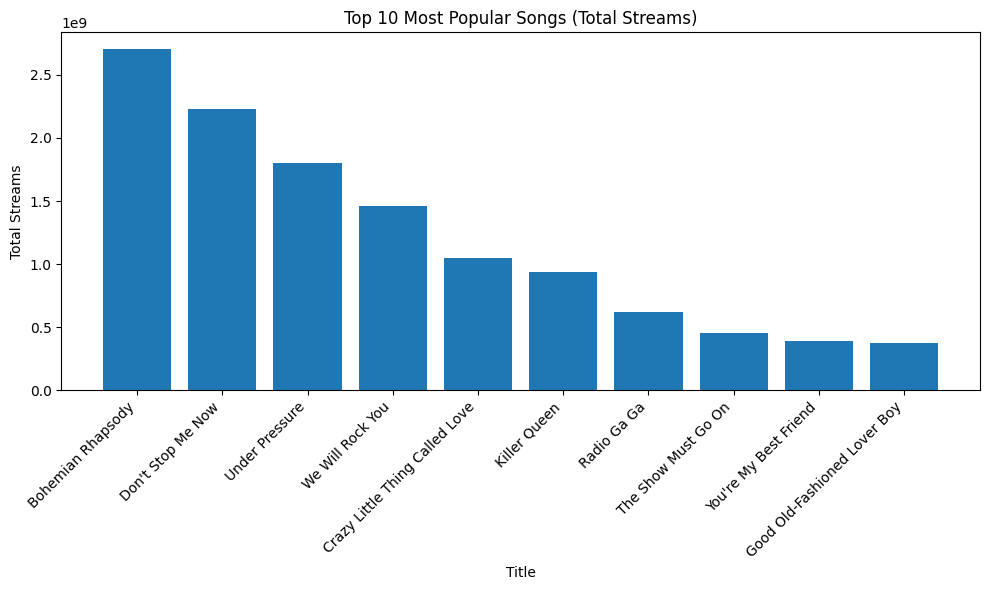

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(song_hit["title"], song_hit["streams"])

plt.xlabel("Title")
plt.ylabel("Total Streams")
plt.title("Top 10 Most Popular Songs (Total Streams)")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Length of Top 10 Most Popular Songs

In [ ]:
song_hit = df_wlen.sort_values(by="streams", ascending=False)
song_hit = song_hit.iloc[:10]
song_hit

,title,genre,year,album,author(s),vocal(s),streams,daily,minute
2,Bohemian Rhapsody,Progressive rock Baroque pop Art rock,1975,A Night At The Opera,Mercury,Mercury,2702397004,927623,5.98
5,Don't Stop Me Now,Pop rock Baroque pop Hard rock,1978,Jazz,Mercury,Mercury,2231639815,997621,3.53
27,Under Pressure,Hard rock,1981,Hot Space,"Queen, David Bowie","Mercury, David Bowie",1804381395,899984,3.94
28,We Will Rock You,Hard rock,1977,News of The World,May,Mercury,1458541650,555322,2.05
4,Crazy Little Thing Called Love,Rockabilly,1980,The Game,Mercury,Mercury,1050455163,506686,2.74
18,Killer Queen,Glam rock Baroque pop Art rock,1974,Sheer Heart Attack,Mercury,Mercury,940827544,335568,3.03
25,The Show Must Go On,Hard rock,1991,Innuendo,May,Mercury,452990254,177471,4.40
30,You're My Best Friend,Pop rock,1975,A Night At The Opera,Deacon,Mercury,388027269,158146,2.87
11,Good Old-Fashioned Lover Boy,Glam rock,1976,A Day At The Races,Mercury,"Mercury, Mike Stone",371326564,153127,2.93
6,Fat Bottomed Girls,Hard rock,1978,Jazz,May,"Mercury, May",327655699,131475,3.41


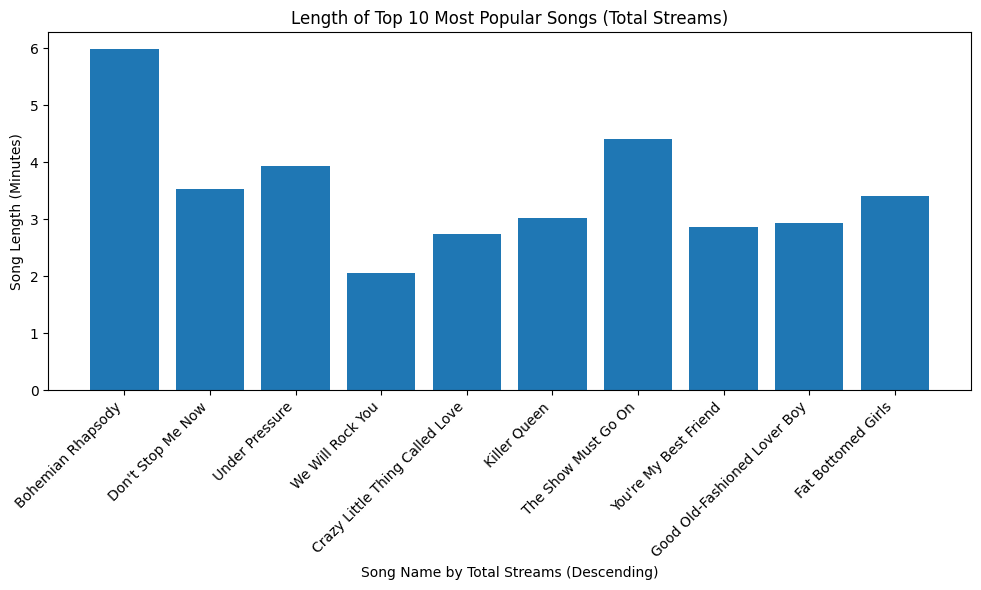

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(song_hit["title"], song_hit["minute"])

plt.xlabel('Song Name by Total Streams (Descending)')
plt.ylabel('Song Length (Minutes)')
plt.title('Length of Top 10 Most Popular Songs (Total Streams)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Percentage of Author(s)

In [ ]:
com_df = df.groupby("author(s)")["title"].count().sort_values(ascending=False)

In [ ]:
com_df = com_df[:5]
percent = np.array(com_df.values)[:5]
mylabels = np.array(com_df.index.values)

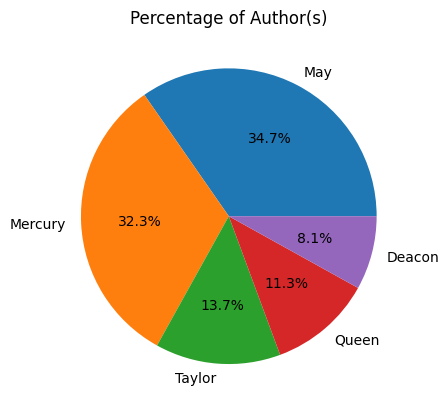

In [ ]:
plt.pie(percent, labels = mylabels, autopct="%1.1f%%")
plt.title("Percentage of Author(s)")
plt.show()

## Percentage of Vocal(s)

In [ ]:
voc_df = df.groupby("vocal(s)")["title"].count().sort_values(ascending=False)
voc_df = voc_df[:5]
percent = np.array(voc_df.values)[:5]
mylabels = np.array(voc_df.index.values)

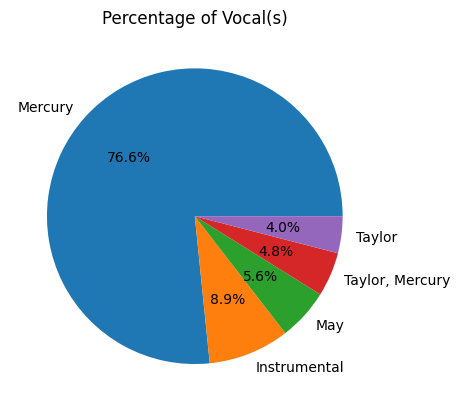

In [ ]:
plt.pie(percent, labels = mylabels, autopct="%1.1f%%")
plt.title("Percentage of Vocal(s)")
plt.show()